# **ARTIFICIAL NEURAL NETWORKS**

# ****A FIRST LOOK AT A NEURAL NETWORK****


**Neural Network**

Let’s look at a concrete example of a neural network that uses the Python library Keras to learn to classify  handwritten digits. The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28  × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST dataset, a classic in the machine-learning  community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of  60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology  (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the “Hello World” of deep learning—it’s  what you do to verify that your algorithms are working as expected. As you become a machine-learning  practitioner, you’ll see MNIST come up over and over again, in scientific papers, blog posts, and so on.  

---

**NOTE ON CLASSES AND LABELS**

In machine learning,  
* a category in a classification problem is called a class.  
* Data points are called samples.  
* The class associated with a specific sample is called a label.

**DATASET:**

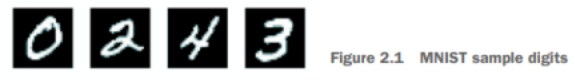


The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.

---

**LOADING THE MNIST DATASET IN KERAS**

train_images and train_labels form the training set, the data that the model will learn from. The model will then be  tested on the test set, test_images and test_labels.  


The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9. The images and  labels have a one-to-one correspondence


## **Data :**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

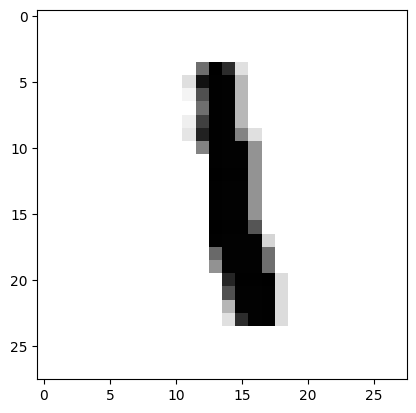

In [ ]:
digital = train_images[6]

import matplotlib.pyplot as plt
plt.imshow(digital, cmap=plt.cm.binary)
plt.show()


**WORKFLOW:**

The workflow will be as follows: First, we’ll feed the neural network the training data, train_images and  train_labels. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce  predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels. Let’s  build the network—again, remember that you aren’t expected to understand everything about this example yet.

---



# **THE NETWORK ARCHITECTURE**

The core building block of neural networks is the layer, a data-processing module that you can think of as a filter  for data. Some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out  of the data fed into them. Here, our network consists of a sequence of two Dense layers, which are densely  connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax layer, which  means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the  current digit image belongs to one of our 10 digit classes.


* **DENSE LAYER:**
Mandatory for classification problem.

* **RELU ACTIVATION:**
For input layer, in all type of classifications.

* **SIGMOID ACTIVATION:**
For output layer, when performing binary classification (classify between 2
types of images/things)

* **SOFTMAX ACTIVATION:**
For output layer, when performing multiple classification (classify between more than 2 types of images/things).


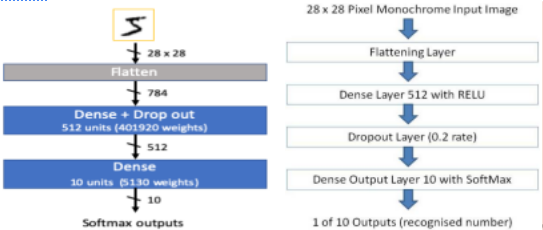


**Network Conections**

In [ ]:
# Import the libraries
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
# input layer
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# output layer
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **THE COMPILATION STEP**

To make the network ready for training, we need to pick three more things, as part of the compilation step:

* **A LOSS FUNCTION :**
How the network will be able to measure its performance on the training data, and thus how it will be able to steer  itself in the right direction.  

* **AN OPTIMIZER :**
The mechanism through which the network will update itself based on the data it sees and its loss function.  

* **METRICS :**
Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images  that were correctly classified).

---

## **Code :**





In [ ]:
network.compile(optimizer='rmsprop' ,  loss='categorical_crossentropy' , metrics=['accuracy'])

**PREPARING THE IMAGE DATA**

Before training, we’ll preprocess the data by **reshaping it into the shape the network expects** and scaling it so that  all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape  **(60000, 28, 28) of type uint8** with values in the [0, 255] interval. We transform it into a **float32 array of shape  (60000, 28 * 28)** **bold text** with values between 0 and 1.

---


## **Reshape :**


In [ ]:
# Assuming you have a library like Keras to load a dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images  =  train_images.reshape((60000 , 28 * 28))
train_images  =  train_images.astype('float32') / 255  # Removed extra parentheses

test_images  =  test_images.reshape((10000 , 28 * 28))
test_images  =  test_images.astype('float32') / 255

In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **PREPARING THE LABELS**

* **ONE HOT ENCODING:**
is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

* **BINARY CROSSENTROPY:**
Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1.  It then calculates the score that penalizes the probabilities based on the distance from the expected value. That  means how close or far from the actual value.

* **CATEGORICAL CROSSENTROPY:**
Also called Softmax Loss. It is a Softmax activation plus a Cross-Entropy loss. If we use this loss, we will train a CNN  to output a probability over the C classes for each image. It is used for multi-class classification.

---

## **Code :**

**One hot Encoding for Lables**

In [ ]:
train_labels[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels =  to_categorical(train_labels)
test_labels =  to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## **TRANNING :**

**With 5  Epochs**

In [ ]:
network.fit(train_images , train_labels , epochs=5 , batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8731 - loss: 0.4385
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9676 - loss: 0.1122
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9782 - loss: 0.0748
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9852 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9892 - loss: 0.0359


**With 20  Epochs**

In [ ]:
network.fit(train_images , train_labels , epochs=20 , batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9923 - loss: 0.0283
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9939 - loss: 0.0225
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9957 - loss: 0.0157
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9974 - loss: 0.0109
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9980 - loss: 0.0083
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9985 - loss: 0.0074
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9988 - loss: 0.0051
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9991 - loss: 0.0037
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9998 - loss: 0.0018
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9998 - loss: 0.0016
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9999 - loss: 9.6757e-04
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━

**With 25  Epochs**

In [ ]:
network.fit(train_images , train_labels , epochs=25 , batch_size=128)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 1.0000 - loss: 1.8218e-04
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 1.0000 - loss: 1.7274e-04
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 1.0000 - loss: 1.6755e-04
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 1.0000 - loss: 1.5566e-04
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 1.0000 - loss: 1.4559e-04
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 1.0000 - loss: 1.3848e-04
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 1.0000 - loss: 1.2939e-04
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 1.0000 - loss: 1.2698e-04
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 1.0000 - loss: 1.2201e-04
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 1.0000 - loss: 1.1541e-04
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 1.0000 - loss: 1.0989

**OBSERVATION:**

Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of  the network over the training data.

We quickly reach an accuracy of 0.989 (98.9%) on the training data. Now let’s check that the model performs well  on the test set, too:


## **TESTING :**

**With 20 Epoch**

In [ ]:
test_loss , test_acc = network.evaluate(test_images , test_labels)
print("test_acc :" , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0925
test_acc : 0.9832000136375427


In [ ]:
test_loss , test_acc = network.evaluate(test_images , test_labels)
print("test_acc :" , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9802 - loss: 0.0925
test_acc : 0.9832000136375427


## **CONCLUSION:**

The test-set accuracy turns out to be 97.8% and 98.4%—that’s quite a bit lower than the training set accuracy. This
gap between training accuracy and test accuracy is an example of **overfitting**: the fact that machine-learning
models tend to perform worse on new data than on their training data.

**WHAT IS OVERFITTING?**

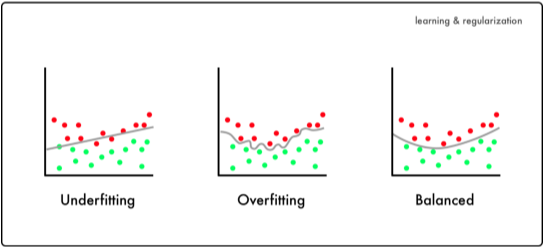



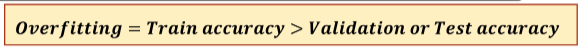

**REDUCE OVERFITTING:**

* 1st step: decrease number of epochs

* 2nd step: decrease number of neurons/units

* 3rd step: decrease number of layers

# **Licence :**

Coded by **Abdul Hadi**

Github : https://github.com/Hadi-Python-1st/Artficial-Neural-Networks

 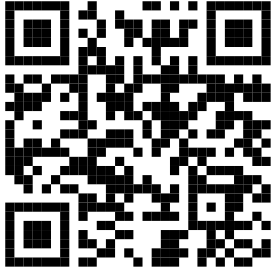